In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
# read data
df = pd.read_csv('log_entropy.csv')
print(df.columns)
print(df['p'].max())

df['turns_remaining'] =  df.groupby('answer')['turn']\
    .transform(np.max) -\
    df['turn']

df.sort_values('p', ascending=False).head()

Index(['turn', 'guess', 'entropy', 'aspce_old', 'aspce_new', 'p', 'answer'], dtype='object')
0.5


,turn,guess,entropy,aspce_old,aspce_new,p,answer,turns_remaining
5727,4,zonal,1.0,1,1,0.5,zonal,0
1472,3,dunce,1.0,2,1,0.5,dunce,0
1494,4,eager,1.0,2,1,0.5,eager,0
1489,4,dwelt,1.0,1,1,0.5,dwelt,0
1488,3,duvet,1.0,2,1,0.5,dwelt,1


  answer  turns
0  aback      4
1  abase      3
2  abate      3
3  abbey      4
4  abbot      3
mean = 3.4742980561555075 turns


Text(0.5, 1.0, 'Spread of counts')

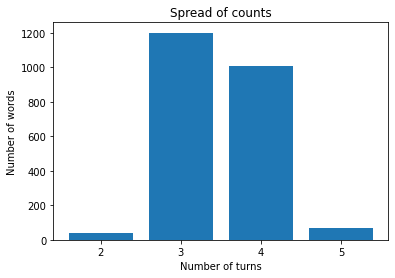

In [3]:
# Get performance
turns_per_guess = df.sort_values(['answer', 'turn'])\
    .groupby('answer')['turn']\
    .max()\
    .reset_index(name='turns')
print(turns_per_guess.head())
print(f'mean = {turns_per_guess["turns"].mean()} turns')
turns_agg = turns_per_guess\
    .groupby('turns')\
    .size()\
    .reset_index(name='count')
plt.bar(turns_agg['turns'], turns_agg['count'])
plt.xticks(turns_agg['turns'])
plt.xlabel('Number of turns')
plt.ylabel('Number of words')
plt.title('Spread of counts')

      mean (id)  10th percentile (id)  90th percentile (id)
turn                                                       
2     62.301080                   8.0                 138.0
3      3.500660                   1.0                   8.0
4      1.147251                   1.0                   1.0
5      1.029851                   1.0                   1.0
      mean (log)  10th percentile (log)  90th percentile (log)
turn                                                          
2       3.667328               2.079442               4.927254
3       0.849411               0.000000               2.079442
4       0.086019               0.000000               0.000000
5       0.020691               0.000000               0.000000
      mean (log10)  10th percentile (log10)  90th percentile (log10)
turn                                                                
2         1.592700                  0.90309                 2.139879
3         0.368894                  0.00000            

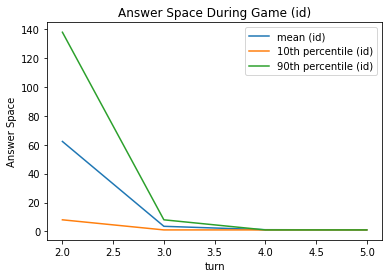

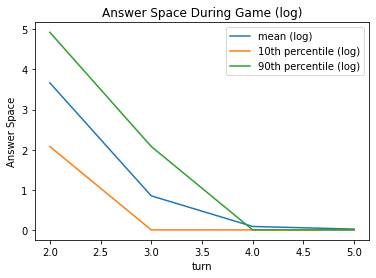

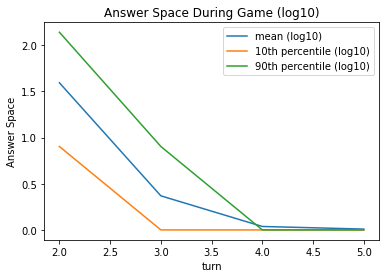

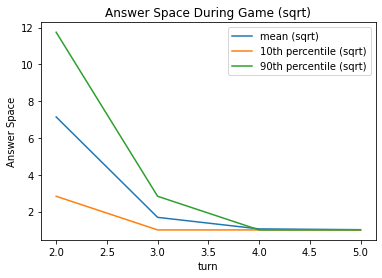

In [4]:
# Plot trajectory of answer space over time/
def trajectory_with_func(f, s):  
    aspce_stats = df.copy()
    aspce_stats['aspce_old'] = aspce_stats['aspce_old'].apply(f) 
    aspce_stats = aspce_stats.groupby('turn')\
        .agg({ 'aspce_old': [np.mean, (lambda x: np.percentile(x, 10)), (lambda x: np.percentile(x, 90))]}) 
    aspce_stats.columns = [f'mean ({s})', f'10th percentile ({s})', f'90th percentile ({s})']
    print(aspce_stats.head())
    aspce_stats.plot()
    plt.ylabel('Answer Space')
    plt.title(f'Answer Space During Game ({s})')
    
trajectory_with_func(lambda x: x, 'id')
trajectory_with_func(np.log, 'log')
trajectory_with_func(np.log10, 'log10')
trajectory_with_func(np.sqrt, 'sqrt')

In [5]:
# want to get turns_remaining as a function of turn
# we can minimise this at teach step
print(df.head())
predictors = ['turn', 'aspce_old', 'p', 'entropy']
df['aspce_old'] = np.log(df['aspce_old'])
model = sm.OLS(df['turns_remaining'], sm.add_constant(df[predictors]))
result = model.fit()
print(result.summary2()) 

   turn  guess  entropy  aspce_old  aspce_new    p answer  turns_remaining
0     2  clink  4.59644         40          3  0.0  aback                2
1     3  aahed  1.58496          3          1  0.0  aback                1
2     4  aback  1.58496          1          1  0.0  aback                0
3     2  belch  2.80735          7          1  0.0  abase                1
4     3  abase  2.80735          1          1  0.0  abase                0
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.741    
Dependent Variable: turns_remaining  AIC:                5607.5488
Date:               2022-02-24 13:56 BIC:                5640.8144
No. Observations:   5728             Log-Likelihood:     -2798.8  
Df Model:           4                F-statistic:        4095.    
Df Residuals:       5723             Prob (F-statistic): 0.00     
R-squared:          0.741            Scale:              0.15571  
--------------------------------